In [1]:
import f3dasm
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-10-05 12:39:28.478812: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
name = "0006"

In [3]:
x = f3dasm.read_pickle(name)

In [4]:
[xo.seeds for xo in x]

[[48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880],
 [48876, 48877, 48878, 48879, 48880]]

In [5]:
def calc_mean_std(results):
    mean_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).mean(axis=1)
    std_y = pd.concat([d.get_output_data().cummin() for d in results], axis=1).std(axis=1)
    return mean_y, std_y

In [6]:
def plot_results(results, ax):
    mean_y, std_y = calc_mean_std(results.data)

    ax.plot(mean_y, label=f"optimizer={results.optimizer}")

    ax.fill_between(np.arange(len(mean_y)), mean_y-1.96*std_y, mean_y+1.96*std_y, alpha=.1)

    return ax

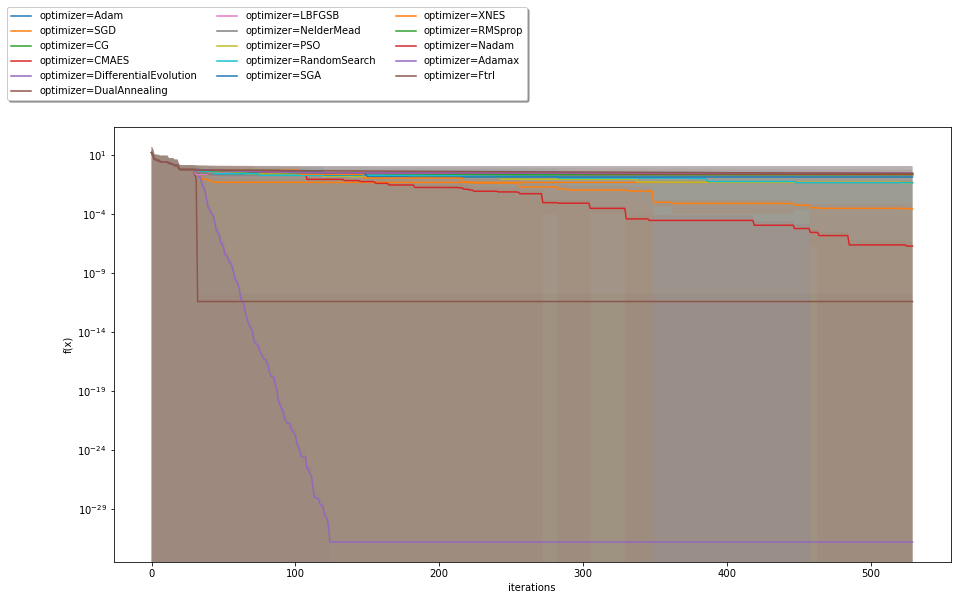

In [7]:
fig, ax = plt.figure(figsize=(15,8)), plt.axes()

ax.set_xlabel('iterations')
ax.set_ylabel('f(x)')
ax.set_yscale('log')

for index, res in enumerate(x):
    ax = plot_results(res, ax)

ax.legend(loc='lower right', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

NelderMead
[        input                  output
           x0        x1             y
144  0.621357 -0.020668  1.499760e-32,         input                  output
           x0        x1             y
148  0.621357 -0.020668  1.499760e-32,         input                  output
           x0        x1             y
150  0.621357 -0.020668  1.499760e-32,         input                  output
           x0        x1             y
128  0.621357 -0.020668  1.499760e-32,        input              output
          x0        x1         y
86  0.900465 -0.020668  1.160453]


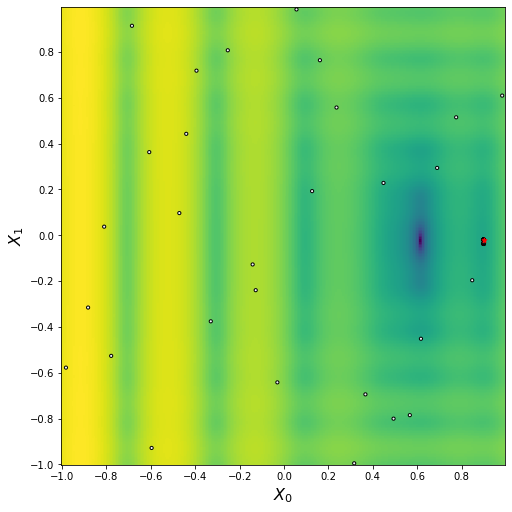

In [20]:
i = 7

x[i].function.plot_data(data=x[i].data[4],domain=np.tile([-1.,1.], (2,1)))
print(x[i].optimizer)

print([x[i].data[j].get_n_best_output_samples(1) for j in range(5)])

CMAES


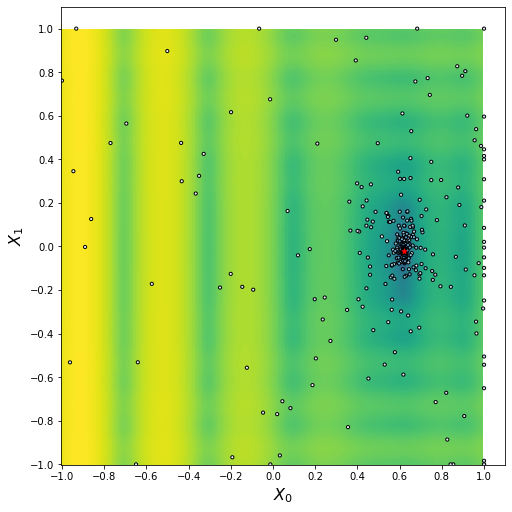

In [14]:
i = 3

x[i].function.plot_data(data=x[i].data[0],domain=np.tile([-1.,1.], (2,1)))
print(x[i].optimizer)

In [13]:
[xo.optimizer for xo in x]

['Adam',
 'SGD',
 'CG',
 'CMAES',
 'DifferentialEvolution',
 'DualAnnealing',
 'LBFGSB',
 'NelderMead',
 'PSO',
 'RandomSearch',
 'SGA',
 'XNES',
 'RMSprop',
 'Nadam',
 'Adamax',
 'Ftrl']

In [10]:
x[0].data[0].data

input                  output
           x0        x1             y
0   -0.123850 -0.556376  4.075276e+01
1    0.355501 -0.829116  8.819126e+00
2   -0.200354 -0.125696  2.734465e+01
3   -0.192720 -0.967356  3.783562e+01
4   -0.500968  0.897082  9.693500e+01
..        ...       ...           ...
525  0.621357 -0.020668  1.106329e-11
526  0.621357 -0.020668  1.106329e-11
527  0.621357 -0.020668  1.106329e-11
528  0.621357 -0.020668  1.106329e-11
529  0.621357 -0.020668  1.106329e-11

[530 rows x 3 columns]